# Warming Up - Combined Multiple Models


이 노트북은 독립적으로 모델1, 모델2를 생성을 하고, 이 두개의 모델의 추론 결과를 한개의 통합된 모델에서 추론하는 예제 입니다. 이를 위해서 다음과 같은 작업을 합니다.

- 첫번재 Mnist 모델 생성 및 훈련
- 두번째 Mnist 모델 생성 및 훈련
- 첫번재, 두번째의 모델을 한개의 모델로 통합
- 통합된 모델에서 각각 모델의 추론 결과를 얻음


---

### 참조: 
- 딥러닝으로 리뷰에서 제품 속성 정보 추출하기
    * http://blog.hwahae.co.kr/all/tech/tech-tech/5967/
- Keras Functional API
    - https://keras.io/guides/functional_api/#setup

# 0. 환경 셋업

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate

In [2]:
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.7.1


# 1. 첫번째 및 두번째 모델  준비

## 1.1 데이터 준비

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## 1.2 두개의 모델 정의 및 생성

In [4]:
def build_model_01():
    inputs = keras.Input(shape=(784,), name="input_a")
    x = Dense(64, activation="relu", name="a_layer_1")(inputs)
    x = Dense(64, activation="relu", name="a_layer_2")(x)
    outputs = Dense(10, name="a_output_layer")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")    
    
    return model

def build_model_02():
    inputs = keras.Input(shape=(784,), name="input_b")
    x = Dense(64, activation="relu", name="b_layer_1")(inputs)
    x = Dense(64, activation="relu", name="b_layer_2")(x)
    outputs = Dense(10, name="b_output_layer")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")    

    
    return model

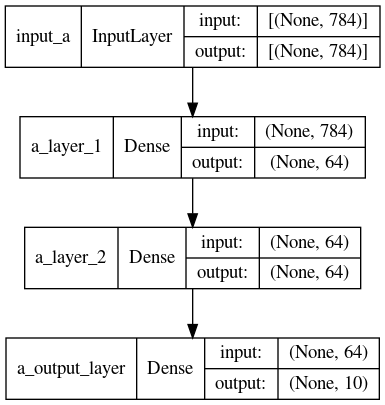

In [5]:
model_01 = build_model_01()
keras.utils.plot_model(model_01, "model_01.png", show_shapes=True)

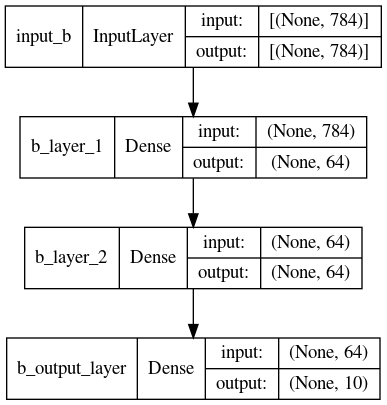

In [6]:
model_02 = build_model_02()
keras.utils.plot_model(model_02, "model_02.png", show_shapes=True)

## 1.3. 두개의 모델 훈련 및 예측

In [7]:
def train(model, epoch, x_train, y_train, x_test, y_test):
    x_train = x_train.reshape(60000, 784).astype("float32") / 255
    x_test = x_test.reshape(10000, 784).astype("float32") / 255

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy"],
    )

    history = model.fit(x_train, y_train, batch_size=64, epochs=epoch, validation_split=0.2)

    test_scores = model.evaluate(x_test, y_test, verbose=2)
    print("Test loss:", test_scores[0])
    print("Test accuracy:", test_scores[1])
    
from sklearn.metrics import accuracy_score

def predict(model, x_test, y_test, n_sample=10):
    x_test = x_test.reshape(10000, 784).astype("float32") / 255

    payload = x_test[0:n_sample]
    print("Inference Input shape: ", payload.shape)
    probs = model.predict(payload)
    print("Inference Output shape:", np.array(probs).shape)        
    
    ground_truth = y_test[0:n_sample]
    print("Ground_Truth: \n", ground_truth)
    
    pre_labels = np.argmax(probs, axis=1)

    print(f"From model - Predicted Label: \n {pre_labels}")
    
    accuracy = accuracy_score(ground_truth, pre_labels)
    print(f"From model - accuracy: \n {accuracy}")

## 1.4. 첫번째 모델 훈련 및 예측

In [8]:
epoch = 1
train(model_01, epoch, x_train, y_train, x_test, y_test)

750/750 [==============================] - 3s 3ms/step - loss: 0.3490 - accuracy: 0.9012 - val_loss: 0.1938 - val_accuracy: 0.9430
313/313 - 0s - loss: 0.1949 - accuracy: 0.9424 - 454ms/epoch - 1ms/step
Test loss: 0.19485394656658173
Test accuracy: 0.9423999786376953


In [9]:
predict(model_01, x_test, y_test, n_sample=100)

Inference Input shape:  (100, 784)
Inference Output shape: (100, 10)
Ground_Truth: 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model - Predicted Label: 
 [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model - accuracy: 
 0.98


## 1.5. 두번째 모델 훈련 및 예측

In [10]:
epoch = 5
train(model_02, epoch, x_train, y_train, x_test, y_test)

Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3486 - accuracy: 0.9008 - val_loss: 0.1882 - val_accuracy: 0.9446
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1566 - accuracy: 0.9547 - val_loss: 0.1452 - val_accuracy: 0.9562
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1115 - accuracy: 0.9665 - val_loss: 0.1114 - val_accuracy: 0.9661
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.9738 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.1015 - val_accuracy: 0.9691
313/313 - 0s - loss: 0.0945 - accuracy: 0.9725 - 459ms/epoch - 1ms/step
Test loss: 0.09453722089529037
Test accuracy: 0.9725000262260437


In [11]:
predict(model_02, x_test, y_test, n_sample=100)

Inference Input shape:  (100, 784)
Inference Output shape: (100, 10)
Ground_Truth: 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model - Predicted Label: 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 3 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model - accuracy: 
 0.99


# 2. 두 개의 모델을 한개의 모델로 통합

## 2.1. 두개의모델을 통합 및 네트워크 보기

In [12]:
def combine_model(base_model, add_model, model_ver):
    '''
    # 추가할 토픽이 학습된 모델에서 PLM을 제외한 layer만을 가져옴
    '''
    len_add_model = len(add_model.layers)
    start_layer_new_model_except_input = 1 # first dense layer
    start_layer_base_model = 0    # input layer
    
    len_base_model = len(base_model.layers)    
    print("len layers of add_model: ", len_add_model )
    print("len layers of len_base_model: ", len_base_model )    
            
    for i in range(start_layer_new_model_except_input,len_add_model):
        print("added modellayer # : ", i)

        if i == 1:
            # 첫번째 레이어는 PLM에 붙이고
            base_input_layer_output = base_model.layers[start_layer_base_model].output # 784            
            X = add_model.layers[i](base_input_layer_output)
        else:
            # 이후 레이어는 이전 레이어에 붙이자!
            X = add_model.layers[i](X)
    
    outputs = base_model.outputs
    outputs.append(X)
        
    # 결합모델 생성
    combined_model = tf.keras.Model(inputs=base_model.input, outputs=outputs, name="1")
    
    return combined_model

wrapped_model = combine_model(model_01, model_02, model_ver="1.0")



len layers of add_model:  4
len layers of len_base_model:  4
added modellayer # :  1
added modellayer # :  2
added modellayer # :  3


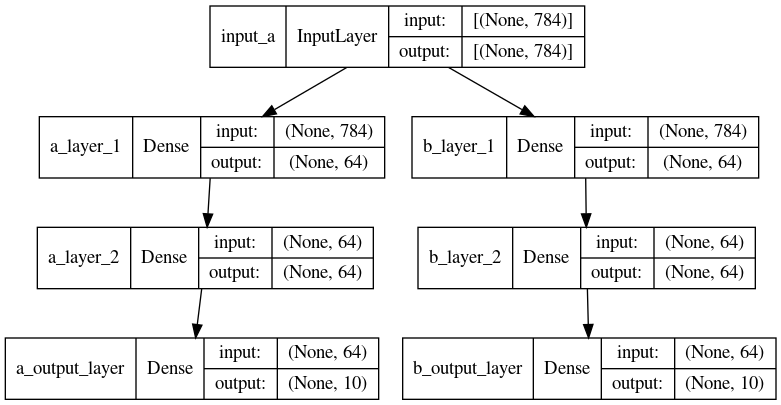

In [13]:
keras.utils.plot_model(wrapped_model, "my_first_combined_model_with_shape_info.png", show_shapes=True)

## 2.2. 통합된 모델을 예측 해보기

In [14]:

def predict_c(model, x_test, y_test, n_sample=10):
    x_test = x_test.reshape(10000, 784).astype("float32") / 255

    payload = x_test[0:n_sample]
    print("Inference Input shape: ", payload.shape)
    probs = model.predict(payload)
    print("Inference Output shape:", np.array(probs).shape)        
    
    
    ground_truth = y_test[0:n_sample]
    print("Ground_Truth: \n", ground_truth)


    for i, prob in enumerate(probs):
        #print("prob: ", prob)
        pre_labels = np.argmax(prob, axis=1)

        print(f"From model_0{i} - Predicted Label: \n {pre_labels}")

        accuracy = accuracy_score(ground_truth, pre_labels)
        print(f"From model_0{i} - accuracy: {accuracy}")
    

In [15]:
predict_c(wrapped_model, x_test, y_test, n_sample=100)

Inference Input shape:  (100, 784)
Inference Output shape: (2, 100, 10)
Ground_Truth: 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model_00 - Predicted Label: 
 [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model_00 - accuracy: 0.98
From model_01 - Predicted Label: 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 3 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
From model_01 - accuracy: 0.99
